<a href="https://colab.research.google.com/github/marcon21/anlp-labs/blob/main/01_ANLP_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by copying this into your Google Drive!!

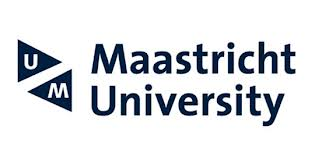
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Advanced Natural Language Processing (ANLP) - Tutorial Tokenization

By Jan Scholtes
Version 2024-2025.1



---



Welcome to the tutorial on Tokenization. In this notebook you will learn how to preprocess text into tokens.

This is the basis of any Information Retrieval, Text Mining or NLP process. Tokenization is closely related to sentence detection, stemming, lemmatization and is part of the large NLP research topic named morphology.

Tokenization is highly language dependent. In this tutorial we focus on Western-European languages.

In this notebook, we will use the Stanford NLTK library.



Text extraction and cleanup is an important component of real-world NLP systems. Text extraction allows one to extract text from various electronic file formats (TXT, HTML, XML, PDF, DOCX, XLSX, PPTX, ...) and deals with the encoding of the characters (Unicode, UTF-8, Code pages or ACSII).

Libraries such as BeautifulSoup, Scapy or Selenium can assist you with webscraping and parsing text from HTML and XML.

You can run the example hereunder to see how a Webpage is scraped and parsed into tags, which can subsequently be questioned (remove the # before this line:"pprint(soupified.prettify())" to see the entire HTML file (it is long).

In [ ]:
# making the necessary imports,
from pprint import pprint
from bs4 import BeautifulSoup
import requests
myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
html = requests.get(myurl, headers={'user-agent': 'Scraper'}).text # query the website
soupified = BeautifulSoup(html, 'html.parser') # parse the html in the 'html' variable, and store it in Beautiful Soup format"

#pprint(soupified.prettify())      # for printing the full HTML structure of the webpage

question = soupified.find("div", {"class": "question"}) # find the nevessary tag and class which it belongs to
questiontext = question.find("div", {"class": "s-prose js-post-body"})
print("Question: \n", questiontext.get_text().strip())
answer = soupified.find("div", {"class": "answer"}) # find the nevessary tag and class which it belongs to
answertext = answer.find("div", {"class": "s-prose js-post-body"})
print("Best answer: \n", answertext.get_text().strip())

PDF can be quite challenging, especially from a formatting point of view. There are also many PDF reverse engineered formats that do not follow the official PDF guideliness completely. For popular formats from Microsoft, Google, Open Office and other vendors, there are several open source libraries to exract text and meta data. For more obscure file types, one has to fall back to commercial solutions such as Oracle Outside In, but these can be expensive.

Encoding normalization is important to map various variants of code pages (https://en.wikipedia.org/wiki/Code_page ), ASCII and other encodings to one common Unicode format (https://home.unicode.org/). UTF-8 is the most used one.

In this tutorial, we presume all this has been done and we can start with UTF-8 text files that only contain basic line (CR-LF) and tab formatting.

#NLTK

First we load NLTK

In [ ]:
import nltk
nltk.download('punkt') # load tokenization

NLTK also contains many text corpora. Let's import the movie reviews.

In [ ]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
movie_reviews.readme()

Let's see what is in there

In [ ]:
raw = movie_reviews.raw()
print(raw[0:1000:1]) # print first 1000 chars


Let's see if we can detect the long tail that is typical for natural language. First we seperate the text in indivudual words, then we run a frequency analsyis on the results.

In [ ]:
corpus = movie_reviews.words()
print(corpus)
freq_dist = nltk.FreqDist(corpus)
print(freq_dist)
print(freq_dist.most_common(50))
freq_dist.plot(500)

# Exercise 1:
a. What kind of a relation do you observe? A lineair, polynomial or power relation?  

b. What are the most frequent words?

c. Do these words have a clear meaning or can they have multiple meaning depending on the context?

d. Can these words also be used for (long) distance (complex) references?

e. What does this mean for your NLP algorithm?

ANSWER HERE:

1.a

1.b

1c.

1d.

1e.



As you can also observe, punctuation characters such as .  and , and other ones (: ; " " ? ! ) are still in there. This is where tokenization comes in. Tokenization removes punctuations where they are used as sentence and phrase seperation, but leaves them where they are part of a token (e.g. an email address or abbreviation).  

#Sentence Detection

Sentences are the basic components of human language. For all of the applications we discuss in this course (e.g. Machine Translation, Abstracting, ...) the algorithms used to process language presume that the data consists of correct linguistic sentences. When machine learning is applied, this is also done using correct linguistic sentences. Therefor, sentence detection is extremely important in NLP. If language does not have the form of linguistic sentences, then many of the algorithms we teach in this course will not work. This is the case when dealing with tables, graphs or certain types of headers and footers (e.g. an address in the top of a letter).

Next, we load the NLTK tokenizer for sentences (sent_tokenize) and for words (word_tokenize)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
my_text = "The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - \n is Maastricht University’s largest and oldest department \n broadly covering the fields of artificial intelligence, data science, computer science, \n mathematics and robotics. We maintain a large network of public and \n private partners through our research collaborations and through the \n award-winning KE@Work programme. In addition, our staff teaches approximately 800 bachelor’s and master’s \n students in 3 specialized study programmes in Data Science \n and Artificial Intelligence. The Department of Advanced Computing Sciences \n  is the new joint identity of the Institute of Data Science (IDS) and the former \n Department of Data Science and Knowledge Engineering (DKE)."
print(my_text)


# Word Detection aka Tokenization

In [ ]:
my_sentences = sent_tokenize(my_text)
# print(my_sentences) # print entire list unformatted
print("\n")
for x in range(len(my_sentences)):
    print(my_sentences[x]+"\n")

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation.
A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. A type is the class of all tokens containing the same character sequence.

In [ ]:
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = word_tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))


As you can observe, there are still punctuation in the list of tokens. In NLTK these can be removed by using a regular expression.

In [ ]:
from nltk.tokenize import RegexpTokenizer
new_tokenizer = RegexpTokenizer(r'\w+')
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = new_tokenizer.tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))

#Exercise 2:
As you can observe, our tokenizer cannot deal with tokens such as "Bachelor's" or "Master's". This has to do with the fact that the NLTK tokenizer does not recognize 's as 'its'. It is not part of the tokenizer's code to deal with that. When dealing with chemical formulas, RNA/DNA, part numbers, phone numbers (with spaces, -, . etc) we see similar problems. When there are problems with the tokenization, the errors propagate in subsequent parts of the processing.

We can address this problem by applying preprocessing and normalization of such tokens.

Write some code to preprocess 's into its and then do proper tokenization.

YOUR ANSWER HERE

# Generate a Vocabulary

A vocabulary is a data structure containing every unique word used in the corpus only once and in alphabetical order. This can be used as a dictionairy in NLP or as the basis of a search index in information retrieval.

In [ ]:
corpus_tokens = new_tokenizer.tokenize(my_text.lower()) #use the tokenizer that removes punctuation
vocab = sorted(set(corpus_tokens))
print(vocab)
print("Tokens:", len(corpus_tokens))
print("Vocabulary:", len(vocab))

#Stop Words

In the past, when computer resources were still limited, highly frequent words were often removed in information retrieval applications. These are named stop-words or noise-words. These are words such as "the, on, in, a, be, or, and, an, for, to, ...". If such a word is removed, one can no longer search for them. Imagine searching for "to be or not to be", which is no longer after noise word removal.

In text-mining and advanced NLP (especially when using context-sensitive deep-leaning models), these words often contain important clues on the meaning of language. Removing them will completely destroy the performance of the models.

So, these days as computer resources are much larger and context sensitive models need these words for disambiguation, noise words are no longer removed.

But let's try how to remove them using NLTK.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print("Stopwords from NLTK:", stopwords.words('english'))
stop_words_nltk = set(stopwords.words('english'))
# we use the token list without punctuations
print("Tokenized corpus:",corpus_tokens)
#now remove stopwords
tokenized_corpus_without_stopwords = [i for i in corpus_tokens if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)

#Exercise 3:

ANSWER HERE

3.a What do you observe with respect to case sensitivity of proper names and words such as "I".

3.b How can we solve that?

3.c Could this actions also lead to unwanted side effects?



#Stemming

Stemming is the process of removing suffixes and reducing the word to some base form such that all different variations of a word can be represented by one form. Stemming uses rules and may not always result in the correct linguistic base form. However, it is fast and therefor often used by search engines. As we discussed in the lecture, a well-known stemmer for the English language is the Porter stemmer.

Let's try it ...

In [ ]:
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
print("before stemming -> after stemming")
for word in corpus_tokens:
  print(str(word) + " -> " + str(stemmer.stem(word)))


As you can see, "students" is converted into "student", but "Science" is converted into "scien". There are other non-linguistically correct transformations.

#Lemmatization

This why we prefer to use lemmatization for linguistic applications other than search engines. Lemmatization is the process of mapping all tokens to its base-linguistic form: the "lemma". So "better" should be converted to "good" and "is" to "be".

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # downloading wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
print("before lemmatization -> after lemmarization")
for word in corpus_tokens:
  print(str(word) + " -> " + str(lemmatizer.lemmatize(word)))

As you can observe, only plurals and other basic operations are performed. But "is" not converted to "be". Neither are several verb inflections. This is because Lemmatization requires more linguistic knowledge: it need to know whether we are dealing with, for instance, a verb, noun or a adjectice. We call these gramatical roles "part-of-speech" or POS tags. These will be discussed in the next lecture: Syntax and Semantics.

In [ ]:
print(lemmatizer.lemmatize('better'))
print(lemmatizer.lemmatize('better',pos='a')) # a for Adjective
print(lemmatizer.lemmatize('is'))
print(lemmatizer.lemmatize('is',pos='v'))  # v for Verb
print(lemmatizer.lemmatize('is',pos='a'))
print(lemmatizer.lemmatize('is',pos='n'))  # n for Noun
print(lemmatizer.lemmatize('richer',pos='n'))
print(lemmatizer.lemmatize('richer',pos='a'))




# Text-Normalization

In social media, one can run in short-cuts, slang, hash-tags, or emoticons. These can be concerted to their textual forms. Phone numbers, dates and monetary amounts can be written in many different forms. Sometimes, one can even decide to convert all text to either lower case or upper case. This may cause problems in some applications and should be used carefully. We will discuss this in more detail in the course Text Mining, where this is more important.

#Language Detection

Almost all NLP models and algorithms are very language specific: this means that one can only use them with the intenred language. Using them on other language will result in random behavior.  

So, language detection (often per sentence or minimally per paragrpah) is essential for any type of NLP application to perform correctly!

In [ ]:
!pip install langdetect
from langdetect import detect, detect_langs
def language_detection(text, method = "single"):
  if(method.lower() != "single"):
    result = detect_langs(text)
  else:
    result = detect(text)
  return result

multilingual_text = "Elle est vraiment éfficace dans la détection de langue."
print(language_detection(multilingual_text))
multilingual_text = "Het is enorm makkelijk om een taal te herkennen!"
print(language_detection(multilingual_text))
multilingual_text = "Es ist wirklich effektiv bei der Spracherkennung."
print(language_detection(multilingual_text))
multilingual_text = "Nó thực sự hiệu quả trong việc phát hiện ngôn ngữ."
print(language_detection(multilingual_text))
multilingual_text = "إنه فعال حقًا في اكتشاف اللغة."
print(language_detection(multilingual_text))

# Transliteration

Transliteration refers to the method of mapping from one system of writing to another based on phonetic similarity. With this tool, you type in Latin letters (e.g. a, b, c etc.), which are converted to characters that have similar pronunciation in the target language. For transliteration, you need to select the target language. So, results for a transliteration of a Arabic name into English, French or German can be very different for similar names.

Лев Николаевич Толстой

results in different forms of transliteration for different target languages:

Lev Nikolayevich Tolstoy

Léon Tolstoï

Lev Tolstoj

León Tolstó

Lev Tolstoy

Lav Tolstoj

Lev Tolsto

Liuni Tolstoi

Ļevs Tolstojs

Levs Tuolstuos

...




A Python library for transliteration can be found here: https://pypi.org/project/transliterate/. We will discuss this in more detail in the lecture on Machine Translation.

#Exercise 4: Final reflections on tokenization.

As we have seen in this tutorial, tokenization is a very important component of NLP. Any error in this phase will propagate in the rest of the processing. Tokenization errors can occur from:
- wrong character set (character encodings not in tokenizer)
- wrong language
- wrong sentence detection or no sentences at whole
- un-expected tokens (chemical formula, RNA/DNA. part numbers, ...)
- wrongly dealing with abbreviations
- different spelling variations (212)-123.4567 vs 212 123 4567 for NYC phone numbers.
- text mutilation by using removal of stop words or stemming
- typos, spelling variations and errors

4.a How would you identify potential tokenization problems in your NLP project?

4.b In what order would you do the detection and pre-processing to deal with the above problems in your NLP project?

YOUR ANSWER HERE

4a.

4b.

# Submission
Please share your Colab notebook by clicking File on the top-left corner. Click under Download on Download .ipynb and upload that file to Canvas.